### Computer Vision Series 2: Face detection and recognition in OpenCV with Python

The code comes from the chapter 5 of the book, *learning opencv3 computer vision with python, 2nd Edition*.

In [1]:
import os
import cv2
import numpy as np
import Tkinter

In [2]:
# for sign up
# input 10 pictures
# output your ID 
def generate():
    face_cascade = cv2.CascadeClassifier('./cascades/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('./face_detection/cascades/haarcascade_eye.xml')
    camera = cv2.VideoCapture(0)
    count = 1
    # set new file store new graph
    dirnames = './orl_faces'
    file_num = [int(file_sub.replace('s', '')) for file_sub in os.listdir(dirnames)]
    file_path = dirnames + '/' + 's' + str(max(file_num) + 1)
    os.mkdir(file_path)
    
    while (True):
        ret, frame = camera.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        for (x, y, w, h) in faces:
            img = cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            
            f = cv2.resize(gray[y:y+h, x:x+w], (112, 92))
            
            cv2.imwrite(file_path + '/%s.pgm' % str(count), f)
            count += 1
            
        cv2.imshow("camera", frame)
        if cv2.waitKey(1000 / 12) & 0xff == ord("q"):
            break
            
        if count == 11:
            break
                       
    camera.release()
    cv2.destroyAllWindows()
    
    # return your ID 
#    return str(max(file_num) + 1)
    var_1.set("Your ID is : s%s" % str(max(file_num) + 1))
    

In [3]:
# for sign in
# input your ID
# output correct or error, if those picture is that person who have the input ID
def predict(*args):
    
    input_id = var_2.get()
    input_id = int(input_id.replace('s', ''))
    
    dirnames = './orl_faces'
    x, y = [], []
    for subdirname in os.listdir(dirnames):
        subject_path =dirnames + '/' + subdirname
        for filename in os.listdir(subject_path):
            filepath = subject_path + '/' + filename
            im = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            x.append(np.asarray(im, dtype = np.uint8))
            y.append(subdirname)
            
    y = np.asarray([y_sub.replace('s', '') for y_sub in y], dtype = np.int32)
    model = cv2.createEigenFaceRecognizer()
    model.train(np.asarray(x), y)
    
    count = 1
    output_id_list = []
    score_list = []
    # capture new picture
    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('./cascades/haarcascade_frontalface_default.xml')
    while (True):
        read, frame = camera.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        for (x, y, w, h) in faces:
            img = cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            
            f = cv2.resize(gray[y:y+h, x:x+w], (112, 92))
            
            output_id, score = model.predict(f)
            count += 1
            output_id_list.append(output_id)
            score_list.append(score)
            
        cv2.imshow("camera", frame)
        if cv2.waitKey(1000 / 12) & 0xff == ord("q"):
            break
            
        if count == 11:
            break
                       
    camera.release()
    cv2.destroyAllWindows()
    
    
    # return index which value of id == 41 input_id
    id_sc = [idx for idx, v in enumerate(output_id_list) if v == input_id]

    # return if score < 20 threshold value
    logic_v = [score_list[x] < 2000 for x in id_sc]

    if len(id_sc) < 3:
        var_3.set("%s" % "wrong!")
        #print "wrong!"
    else:
        if sum(logic_v) > 2:
            var_3.set("%s" % "correct!")
            #print "correct"
        else:
            var_3.set("%s" % "wrong!")
            #print "wrong"

In [4]:
frame = Tkinter.Tk()
frame.title("Face Recognition")
frame.geometry('500x300+0+0')

# title
Tkinter.Label(frame, text = 'Face Recognition', font='Helvetica -25 bold').grid(row = 0, column = 2)

# sign up button
Tkinter.Button(frame, text = '注册Sign Up', height = 2, width = 10,
               command = generate, bg='green', activebackground='gray').grid(row = 5)
frame.bind('<Return>', generate)
# output your ID 
var_1 = Tkinter.StringVar()
label_a = Tkinter.Label(frame, textvariable = var_1, relief = "raised")
label_a.grid(row = 6)

# sign in button
Tkinter.Label(frame, 
    text = 'Please enter your ID, such as s41 :', font='Helvetica -16 bold').grid(row = 3, column = 3, sticky = "w")

var_2 = Tkinter.StringVar()
entry = Tkinter.Entry(frame, textvariable = var_2)
entry.grid(row=4, column = 3)

Tkinter.Button(frame, text = '登录Sign In', height = 2, width = 10,
               command = predict, bg='yellow', activebackground='gray').grid(row=5, column=3)
entry.focus()
frame.bind('<Return>', predict)

var_3 = Tkinter.StringVar()
label_b = Tkinter.Label(frame, textvariable = var_3, relief = "raised")
label_b.grid(row = 6, column = 3)

# run 
frame.mainloop()

In [5]:
from IPython.display import Image

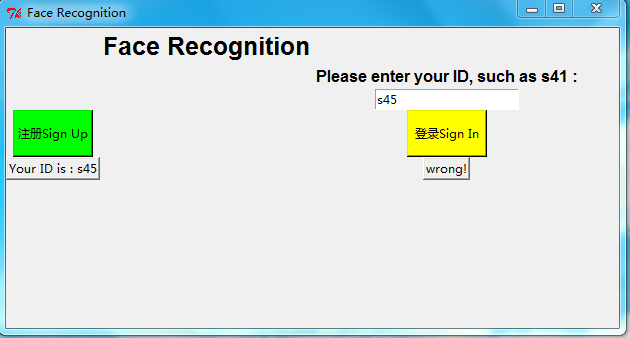

In [6]:
Image("1.PNG")